# Experiments with the one vs rest  multiclass classification scheme

In [1]:
%matplotlib inline

from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier as OvR
from sklearn.svm import LinearSVC
import numpy as np
import copy
from matplotlib import pyplot as plt

In [2]:
digits = datasets.load_digits()

We will use the "Optical Recognition of Handwritten Digits Data Set" from UCI (included in scikit learn and already loaded on the previous line). Let us plot the first 10 images in the dataset.

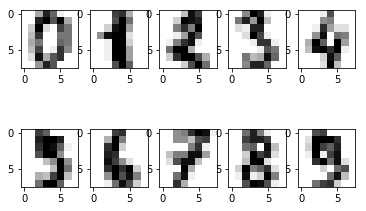

In [3]:
for index, image in enumerate(digits.images[:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

Let us create a training set using the first 1000 images and a test set using the rest of the data.

In [4]:
X,y = digits.data[0:1000], digits.target[0:1000]
X_test, y_test = digits.data[1000:], digits.target[1000:]

scikit-learn provide us with an One-Vs-Rest classifier that we already imported with name `OvR`. Let us use that classifier to fit the training set and to make predictions over the test set:

In [5]:
binaryLearner = LinearSVC(random_state=0)
oneVrestLearningAlgorithm = OvR(binaryLearner)
oneVrestLearningAlgorithm.fit(X,y)
predicted_labels = oneVrestLearningAlgorithm.predict(X_test)

# n.b.: the above is equivalent to:
# predicted_labels = OvR(LinearSVC(random_state=0)).fit(X,y).predict(X_test)

In [6]:
print ("Accuracy: %s" % (1.0 - np.count_nonzero(y_test - predicted_labels) / float(len(predicted_labels))))

Accuracy: 0.908406524467


# Exercise

Reimplement the OvR classifier by completing the methods in the following class [[1](#hint1)]:

In [7]:
import numpy as np
from sklearn.base import clone
class OneVsRestClassifier:
    """
    Parameters
    ----------
    classifier : classifier object
        An estimator object implementing `fit` and one of `decision_function`
    Attributes
    ----------
    estimators_ : list of `n_classes` estimators
        Estimators used for predictions.
    classes_ : dictionary label => index of label,shape = [`n_classes`]
        class labels array
    look_up_table : array, shape['n_classes']
    """
    #constructor
    def __init__(self, classifier):
        self.classifier= classifier
        #init should return none
    
    def fit_class(self, data, ovr_labels,class_):
        """Fit a single binary estimator."""
        ix = self.classes_[class_]
        #print(ovr_labels)
        #print(ix)
        labels = ovr_labels[:,ix]#colonna
        estimator =clone(self.classifier)
        #print(labels)
        estimator.fit(data, labels)
        return estimator
    
    def relabel(self,label):
        index = self.classes_[label]
        row = self.look_up_table[index]
        return row
    
    def fit(self, data, labels):
        """Fit underlying estimators.
        Parameters
        ----------
        data : (sparse) array-like, shape = [n_samples, n_features]
            Data.
        labels : (sparse) array-like, shape = [n_samples, ], [n_samples, n_classes]
            Multi-class targets. An indicator matrix turns on multilabel
            classification.
        Returns
        -------
        self
        """
        neg_label = -1
        pos_label=1
        # get the set of distinct labels
        classes = set(labels);
        n_classes = len(classes)
        # init the squared look up tableto all the negative label
        lut = np.ones(n_classes)*neg_label+np.eye(n_classes)*(abs(neg_label-pos_label))
        # set +1 on the main diag
        id=0
        #create a dictionaty of classes
        classes_ = dict()
        #--- binary labelling--------#
        for i, c in enumerate(classes):
            #assigni the enumerated integer as index of the class c
            classes_[c]=i
        self.classes_=classes_    
        # now we can start learning with the classifier
        self.look_up_table = lut
        self.array_class = list(classes)
        # map each label to the new labels
        ovr_labels =np.array([self.relabel(label) for label in labels])
        self.estimators_ =[self.fit_class(data,ovr_labels,class_) for class_ in classes]
        return self
    
    def _predict_class(self,data,class_):
        index = self.classes_[class_]
        estimator = self.estimators_[index]
        return estimator.predict(data)
    
    def predict(self, data):
        #... to be done ...
        predictions = np.array([self._predict_class(data,class_) for class_ in self.classes_])
        # get the max value for each prediction
        indexes = np.argmax(predictions, axis=0)
        #print(indexes)
        return [self.array_class[i] for i in indexes]

Calculate the accuracy of your solution using the following code [[2](#hint2)]:

In [8]:
ovr = OneVsRestClassifier(LinearSVC(random_state=0))
predicted_labels = ovr.fit(X,y).predict(X_test)
print( "Accuracy: %s" % (1.0-np.count_nonzero(predicted_labels-y_test)/float(len(y_test))))

Accuracy: 0.853199498118


<a name="hint1">Hint 1:</a> Feel free to organize your code as you like (add as many methods as you believe are necessary).

<a name="hint2">Hint 2:</a> The scheme provided by scikit-learn is a little different from the one we have seen in the lessons. It is normal if your accuracy is not as good as the one obtained above (expect the accuracy to be between 0.8 and 0.9).